In [90]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [91]:
raw_df = pd.read_csv("/Users/eamonnmccallum/Monash-DS/gwil_wrk1/data/gwil_datv2.csv")

In [92]:
raw_df

,ID,UNI_ID,UNI_TITLE,GROUP,MED,JOB CAT,JOB ID,JOB_TITLE,YEAR,VALUE
0,2023,1,Australian Catholic University,3,0,1,1,HEW Level 1,1999,0.0
1,2040,1,Australian Catholic University,3,0,1,1,HEW Level 1,2000,0.0
2,2057,1,Australian Catholic University,3,0,1,1,HEW Level 1,2001,0.0
3,2074,1,Australian Catholic University,3,0,1,1,HEW Level 1,2002,0.0
4,2091,1,Australian Catholic University,3,0,1,1,HEW Level 1,2003,0.0
...,...,...,...,...,...,...,...,...,...,...
13918,15862,39,Western Sydney University,3,1,1,2,HEW Level 2,2015,0.0
13919,15879,39,Western Sydney University,3,1,1,2,HEW Level 2,2016,0.0
13920,15896,39,Western Sydney University,3,1,1,2,HEW Level 2,2017,0.0
13921,15666,39,Western Sydney University,3,1,1,10,HEW Level 10,2003,0.0


In [93]:
raw_df["JOB_TITLE"].unique()

array(['HEW Level 1', 'Casuals academic', 'SE ',
       'Academic level A or below', 'Academic level B ',
       'Academic level C ', 'Academic level D and E',
       'Casuals non-academic', 'HEW Level 2', 'HEW Level 10',
       'HEW Level 9', 'HEW Level 8', 'HEW Level 7', 'HEW Level 3',
       'HEW Level 6', 'HEW Level 5', 'HEW Level 4'], dtype=object)

In [94]:
job_df = raw_df[["JOB_TITLE", "JOB ID","YEAR", "VALUE","GROUP" ,"MED"]]

In [95]:
### NEXT HEW GROUP !!!
#BINS SETUP 
#bins
#1 = hew 1-4
#2 = hew 5-7
#3 = hew 8-9
#4= hew10-se 10 17
#5 = A
#6 = B
#7 = C
#8 = D & E
#9 = casual non-aced
#10 = casual
#11 = SE
bins = [0,4,7,9,10,11,12,13,14,15,16,17]

In [96]:
job_bins = job_df
labels = [1,2,3,4,5,6,7,8,9,10,11]
job_bins["BINS"] = pd.cut(job_bins["JOB ID"], bins, labels=labels, include_lowest=True)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
# bins column was originally object needed to be turned to int
job_bins["BINS"] = pd.to_numeric(job_bins["BINS"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
# Manual split of types to create custom
hew1_4 = job_bins.loc[(job_bins["BINS"]== 1)]
hew5_7 = job_bins.loc[(job_bins["BINS"]== 2)]
hew8_9 = job_bins.loc[(job_bins["BINS"]== 3)]
hew10 = job_bins.loc[(job_bins["BINS"]== 4)]
acad_a = job_bins.loc[(job_bins["BINS"]== 5)]
acad_b = job_bins.loc[(job_bins["BINS"]== 6)]
acad_c = job_bins.loc[(job_bins["BINS"]== 7)]
acad_d = job_bins.loc[(job_bins["BINS"]== 8)]
cas_na = job_bins.loc[(job_bins["BINS"]== 9)]
cas_ac = job_bins.loc[(job_bins["BINS"]== 10)]
se = job_bins.loc[(job_bins["BINS"]== 11)]

In [99]:
###### hew 5 to 7 #####


In [100]:
#### Hew 8 to 9 #####

In [101]:
hew8_9 = job_bins.loc[(job_bins["BINS"]== 3)]

In [102]:
#### HEW 10 ####
hew10 = job_bins.loc[(job_bins["BINS"]== 4)]

In [103]:
### Academdic A Group

In [104]:
acad_a = job_bins.loc[(job_bins["BINS"]== 5)]

In [105]:
### Academdic B Group

In [106]:
acad_b = job_bins.loc[(job_bins["BINS"]== 6)]

In [107]:
### Academic c 

In [108]:
acad_c = job_bins.loc[(job_bins["BINS"]== 7)]

In [109]:
### Academic Group D & E 

In [110]:
acad_d = job_bins.loc[(job_bins["BINS"]== 8)]

In [111]:
#### Casual Non Academic 

In [112]:
cas_na = job_bins.loc[(job_bins["BINS"]== 9)]

In [113]:
#### Casual Academic 

In [114]:
cas_ac = job_bins.loc[(job_bins["BINS"]== 10)]

In [115]:
## SE Class 

In [116]:
se = job_bins.loc[(job_bins["BINS"]== 11)]

In [117]:
### Academic Group ###

In [118]:
acadlist = [acad_a, acad_b, acad_c, acad_d,cas_ac]
acad_group = pd.concat(acadlist)

In [119]:
nalist = [hew1_4, hew5_7, hew8_9, hew10, se, cas_na ]
non_acad = pd.concat(nalist)

In [120]:
### Linear Reg ###

In [121]:
X = acad_group["YEAR"]
Y = acad_group["VALUE"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     188.8
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           4.89e-42
Time:                        20:33:59   Log-Likelihood:                -27181.
No. Observations:                4095   AIC:                         5.437e+04
Df Residuals:                    4093   BIC:                         5.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.291e+04    956.785    -13.495      0.0

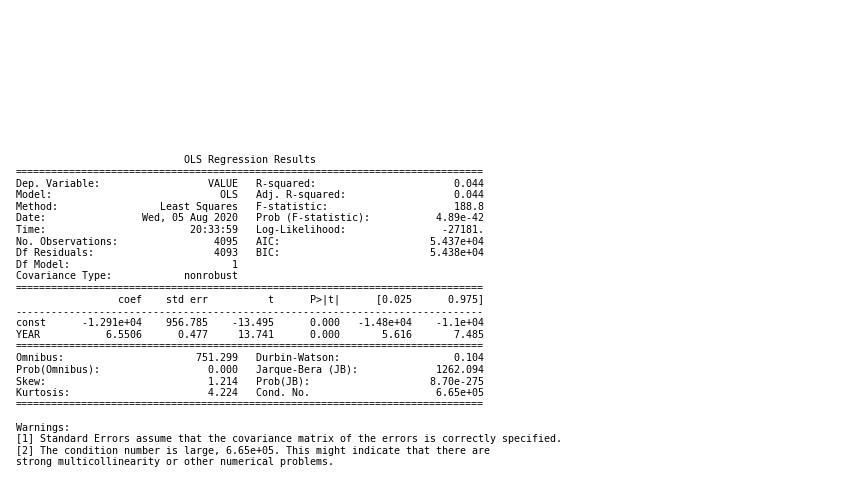

In [122]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

In [123]:
X = non_acad["YEAR"]
Y = non_acad["VALUE"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     178.2
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           2.63e-40
Time:                        20:33:59   Log-Likelihood:                -62331.
No. Observations:                9828   AIC:                         1.247e+05
Df Residuals:                    9826   BIC:                         1.247e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6017.1092    459.553    -13.093      0.0

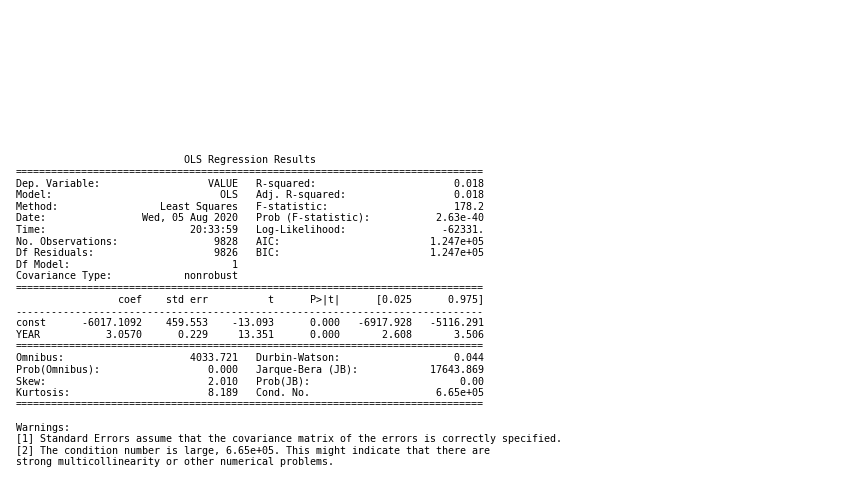

In [124]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output2.png')

In [125]:
### Logistic Regression ###

In [126]:
acad_group["Academic"] = 1
non_acad["Academic"] = 0
listy = [acad_group, non_acad]
logit_df = pd.concat(listy)
logit_df = logit_df.join(pd.get_dummies(logit_df["Academic"]))
logit_df.sample(10)

,JOB_TITLE,JOB ID,YEAR,VALUE,GROUP,MED,BINS,Academic,0,1
2498,SE,17,2002,27.00,3,0,11,0,1,0
7244,Academic level C,13,1997,121.00,2,1,7,1,0,1
10596,Academic level C,13,2012,253.00,2,0,7,1,0,1
8601,Academic level A or below,11,2010,163.00,2,0,5,1,0,1
6792,Academic level C,13,2000,109.00,3,0,7,1,0,1
3512,Academic level A or below,11,2012,42.00,3,0,5,1,0,1
5342,HEW Level 4,4,2016,74.77,3,0,1,0,1,0
1825,HEW Level 9,9,2002,17.80,3,0,3,0,1,0
6473,HEW Level 7,7,2013,100.24,2,0,2,0,1,0
1978,Academic level D and E,14,2000,20.00,3,0,8,1,0,1


In [127]:
features=["VALUE", "YEAR", 0,1]
X = logit_df[features]
X = sm.add_constant(X)
y = logit_df["MED"]

In [128]:
lm = sm.Logit(y, X)

In [129]:
result = lm.fit()

Optimization terminated successfully.
         Current function value: 0.622116
         Iterations 6


In [130]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    MED   No. Observations:                13923
Model:                          Logit   Df Residuals:                    13919
Method:                           MLE   Df Model:                            3
Date:                Wed, 05 Aug 2020   Pseudo R-squ.:                 0.09863
Time:                        20:34:00   Log-Likelihood:                -8661.7
converged:                       True   LL-Null:                       -9609.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1336   1.19e+06   2.28e-05      1.000   -2.34e+06    2.34e+06
VALUE          0.0058      0.000     37.292      0.000       0.005       0.006
YEAR          -0.0208      0.003     -6.847      0.000      -0.027      -0.015
0             13.8965   1.19e+06   1.17e-05      1.000   -2.34e+06    2.34e+06
1             13.2372   1.19e+06   1.11e-05      1.000   -2.34e+06    2.34e+06
==============================================================================
"""

In [131]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
npe = np.exp(conf)
print(npe)

              0         1            OR
const  0.000000       inf  6.081241e+11
VALUE  1.005472  1.006081  1.005776e+00
YEAR   0.973545  0.985233  9.793716e-01
0      0.000000       inf  1.084376e+06
1      0.000000       inf  5.608414e+05


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [132]:
print(logit_df.MED.mean())

0.46153846153846156


In [133]:
print(np.exp(result.params))

const    6.081241e+11
VALUE    1.005776e+00
YEAR     9.793716e-01
0        1.084376e+06
1        5.608414e+05
dtype: float64


In [134]:
predicted = result.predict(X)
threshold = 0.5
predicted_classes = (predicted > threshold).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(y, predicted_classes)

0.6452632334985277

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


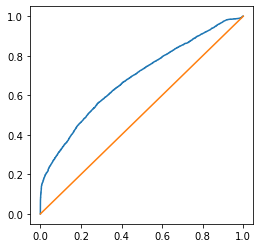

In [136]:
plt.figure(figsize = (4, 4))
plt.plot(roc_curve(logit_df[["MED"]], predicted)[0], roc_curve(logit_df[["MED"]], predicted)[1])
plt.plot([0.0,0.2,0.4,0.6,0.8,1.0],[0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

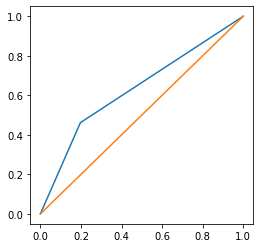

In [137]:
plt.figure(figsize = (4, 4))
plt.plot(roc_curve(logit_df[["MED"]], predicted_classes)[0], roc_curve(logit_df[["MED"]], predicted_classes)[1])
plt.plot([0.0,0.2,0.4,0.6,0.8,1.0],[0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

In [138]:
roc_auc_score(logit_df["MED"], predicted_classes)

0.6321528611444578

In [139]:
### autocorreltaion 

In [152]:
acad_group["Academic"] = 1
non_acad["Academic"] = 0
listy = [acad_group, non_acad]
autocorr_df = pd.concat(listy)
autocorr_df

,JOB_TITLE,JOB ID,YEAR,VALUE,GROUP,MED,BINS,Academic
30,Academic level A or below,11,2014,0.0,3,0,5,1
52,Academic level A or below,11,2012,0.0,3,0,5,1
56,Academic level A or below,11,2011,0.0,3,0,5,1
57,Academic level A or below,11,2013,0.0,3,0,5,1
69,Academic level A or below,11,2014,0.0,3,0,5,1
...,...,...,...,...,...,...,...,...
13751,Casuals non-academic,15,1998,0.0,3,0,9,0
13752,Casuals non-academic,15,1999,0.0,3,0,9,0
13885,Casuals non-academic,15,1997,0.0,3,0,9,0
13886,Casuals non-academic,15,1998,0.0,3,0,9,0


In [141]:
autocorr_2n3 = autocorr_df.loc[(autocorr_df["GROUP"]== 2)|(autocorr_df["GROUP"]== 3)]
autocorr_2n3.set_index("YEAR")
autocorr_2n3A = autocorr_2n3.loc[(autocorr_df["Academic"]== 1)]
autocorr_2n3N = autocorr_2n3.loc[(autocorr_df["Academic"]== 0)]


In [142]:
auto_corNmA = autocorr_2n3A.loc[(autocorr_2n3A["MED"]== 0)]

auto_corMA = autocorr_2n3A.loc[(autocorr_2n3A["MED"]== 1)]

In [143]:
auto_corMA["VALUE"].autocorr(lag=1)

0.9554455543974479

In [144]:
auto_corNmA["VALUE"].autocorr(lag=1)

0.9808403985226286

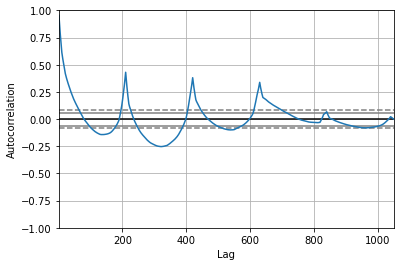

In [145]:
#uni group 2 & 3 Academic with med
pd.plotting.autocorrelation_plot(auto_corMA["VALUE"])

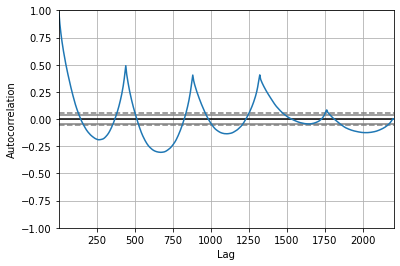

In [146]:
#uni group 2 & 3 Academic without med
pd.plotting.autocorrelation_plot(auto_corNmA["VALUE"])

In [147]:
auto_corNN = autocorr_2n3N.loc[(autocorr_2n3N["MED"]== 0)]

auto_corMN = autocorr_2n3N.loc[(autocorr_2n3N["MED"]== 1)]

In [148]:
auto_corMN["VALUE"].autocorr(lag=1)

0.9853623829525485

In [149]:
auto_corNN["VALUE"].autocorr(lag=1)

0.9772027403646562

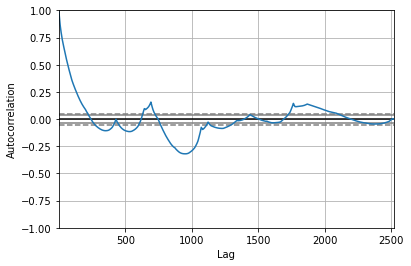

In [150]:
#uni group 2 & 3 Non-Academic with med
pd.plotting.autocorrelation_plot(auto_corMN["VALUE"])

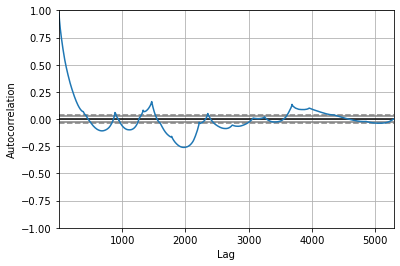

In [151]:
#uni group 2 & 3 Non-Academic without med
pd.plotting.autocorrelation_plot(auto_corNN["VALUE"])